## **Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
%matplotlib inline

C:\Users\naman\AppData\Roaming\Python\Python39\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# **Data Analysis**

In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.shape

(6362620, 11)

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:>

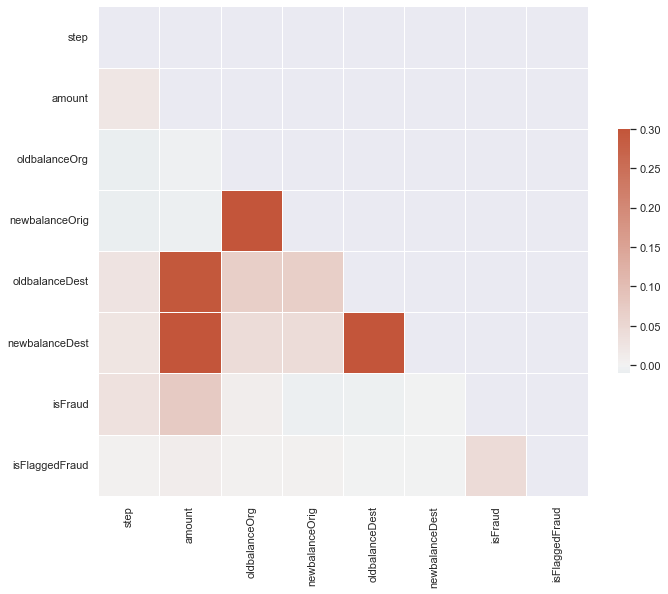

In [8]:
sns.set_theme(style="dark")
rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(50, 11)),
#                  columns=list(df))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
df['isFraud'].value_counts()
label=df['isFraud'].value_counts().index
val=df['isFraud'].value_counts().values

([<matplotlib.patches.Wedge at 0x22c2b44ff10>,
 [Text(-1.099990955625572, 0.004460666087110192, '0'),
  Text(1.0999909559371663, -0.004460589247970448, '1')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.87%'),
  Text(0.599995066874818, -0.002433048680711153, '0.13%')])

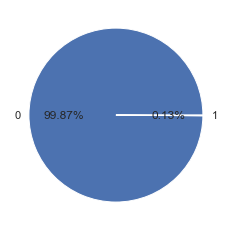

In [11]:
plt.pie(val, labels=label, autopct='%1.2f%%')

In [12]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [13]:
# label1=df['type'].value_counts().index
# val1=df['type'].value_counts().values

In [14]:
# print("values",val1)
# print(label1)
dict={'CASH_OUT':2237500 , 'PAYMENT':2151495, 'CASH_IN':1399284, 'TRANSFER':532909, 'DEBIT':41432}

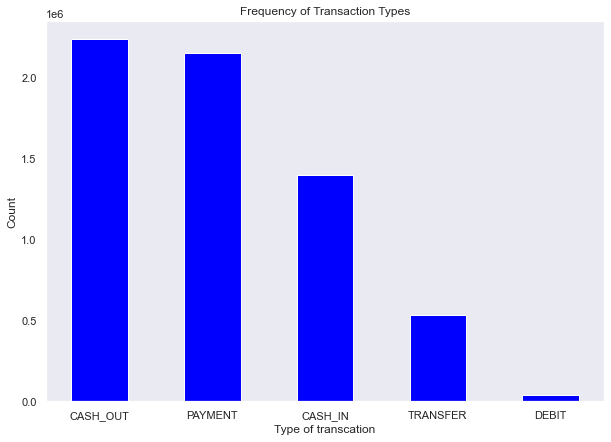

In [15]:
fig = plt.figure(figsize =(10, 7))
# plt.bar(list(dict.keys()), list(dict.values()))
# plt.show()
Type=list(dict.keys())
Count = list(dict.values())
plt.bar(Type, Count, color ='blue',
        width = 0.5)
 
plt.xlabel("Type of transcation")
plt.ylabel("Count")
plt.title("Frequency of Transaction Types")
plt.show()

In [16]:
#final_df=pd.get_dummies(df,columns=["type"],drop_first = True)

In [17]:
final_df=df.loc[df['type'].isin(['CASH_OUT', 'TRANSFER']),:]

In [18]:
final_df.type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [19]:
final_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [20]:
final_df['type']=final_df['type'].map({'TRANSFER':1, 'CASH_OUT':0})

C:\Users\naman\AppData\Local\Temp/ipykernel_1960/1844777880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['type']=final_df['type'].map({'TRANSFER':1, 'CASH_OUT':0})


In [21]:
final_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,1,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,0,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,0,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,1,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,1,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [22]:
final_df.drop('nameOrig',axis=1,inplace=True)

c:\Users\naman\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
final_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,1,181.00,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,0,181.00,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,0,229133.94,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,1,215310.30,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,1,311685.89,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [24]:
final_df['nameDest']=final_df['nameDest'].str[0]

C:\Users\naman\AppData\Local\Temp/ipykernel_1960/170548332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['nameDest']=final_df['nameDest'].str[0]


In [25]:
final_df['nameDest']=final_df['nameDest'].map({'M':1,'C':0})

C:\Users\naman\AppData\Local\Temp/ipykernel_1960/3126743910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['nameDest']=final_df['nameDest'].map({'M':1,'C':0})


In [26]:
final_df.shape

(2770409, 10)

In [27]:
final_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,1,181.00,181.0,0.0,0,0.0,0.00,1,0
3,1,0,181.00,181.0,0.0,0,21182.0,0.00,1,0
15,1,0,229133.94,15325.0,0.0,0,5083.0,51513.44,0,0
19,1,1,215310.30,705.0,0.0,0,22425.0,0.00,0,0
24,1,1,311685.89,10835.0,0.0,0,6267.0,2719172.89,0,0


In [28]:
Y=final_df['isFraud']
X=final_df.drop('isFraud', axis=1)

Normalization

In [29]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [30]:
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=0.02, random_state=32)

In [31]:
X_dev, X_test, Y_dev, Y_test = train_test_split(X_dev, Y_dev, test_size=0.5, random_state=32)

In [32]:
print(len(X_train))
print(len(X_dev))
print(len(X_test))

2715000
27704
27705


In [33]:
# from sklearn.ensemble import RandomForestRegressor
# random_forest_regressor=RandomForestRegressor()
# random_forest_regressor.fit(X_train,Y_train)

## **Model Building**

**Naive bayes**

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [35]:
train_acc=gnb.score(X_train,Y_train)
test_acc=gnb.score(X_test,Y_test)
dev_acc=gnb.score(X_dev,Y_dev)
print('Training Accuracy: ',round(train_acc*100, 2),'%')
print('Dev Accuracy: ',round(dev_acc*100, 2),'%')
print('Testing Accuracy: ',round(test_acc*100, 2),'%')

Training Accuracy:  99.12 %
Dev Accuracy:  99.13 %
Testing Accuracy:  99.17 %


In [36]:
predictions=gnb.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

c:\Users\naman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

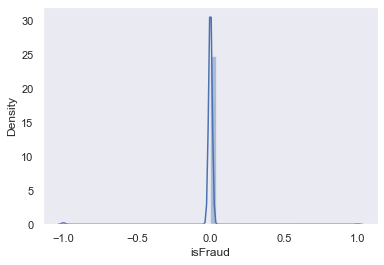

In [37]:
sns.distplot(Y_test-predictions)

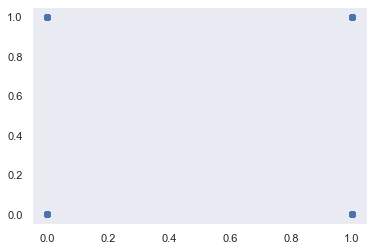

In [38]:
plt.scatter(Y_test,predictions)

In [39]:
predictions1=gnb.predict(X_dev)
predictions1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

c:\Users\naman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

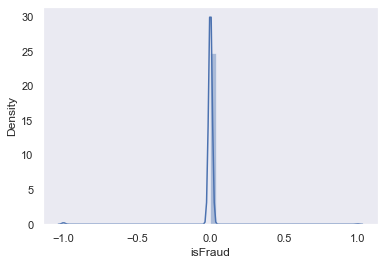

In [40]:
sns.distplot(Y_dev-predictions1)

**Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression()

In [42]:
train_acc=clf.score(X_train,Y_train)
test_acc=clf.score(X_test,Y_test)
dev_acc=clf.score(X_dev,Y_dev)
print('Training Accuracy: ',round(train_acc*100, 2),'%')
print('Dev Accuracy: ',round(dev_acc*100, 2),'%')
print('Testing Accuracy: ',round(test_acc*100, 2),'%')

Training Accuracy:  99.83 %
Dev Accuracy:  99.82 %
Testing Accuracy:  99.83 %


In [43]:
predictions=clf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

c:\Users\naman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

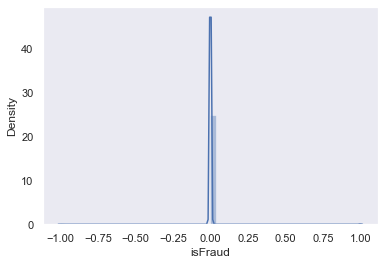

In [44]:
sns.distplot(Y_test-predictions)

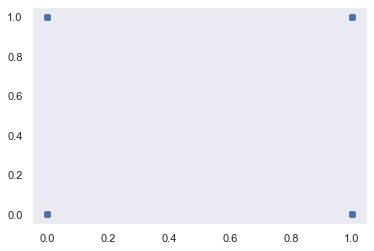

In [45]:
plt.scatter(Y_test,predictions)

**Random Forest Classifier**

In [46]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier=RandomForestClassifier()
random_forest_classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [47]:
train_acc=random_forest_classifier.score(X_train,Y_train)
test_acc=random_forest_classifier.score(X_test,Y_test)
dev_acc=random_forest_classifier.score(X_dev,Y_dev)
print('Training Accuracy: ',round(train_acc, 2),'%')
print('Dev Accuracy: ',round(dev_acc, 2),'%')
print('Testing Accuracy: ',round(test_acc*100, 2),'%')

Training Accuracy:  1.0 %
Dev Accuracy:  1.0 %
Testing Accuracy:  99.94 %


In [48]:
predictions=random_forest_classifier.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)